# Un EDA de pocos minutos con Pandas

EDA es la sigla en inglés para Exploratory Data Analysis y consiste en una de las primeras tareas que
tiene que desempeñar el Científico de Datos. Es cuando revisamos por primera vez los datos que nos
llegan, por ejemplo un archivo CSV y deberemos intentar comprender “¿de qué se trata?”, vislumbrar
posibles patrones y reconocer distribuciones estadísticas que puedan ser útiles en el futuro.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm    #!pip install statsmodels

In [5]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";")

In [6]:
df.head(10)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,NaN,AL,783754,"sq,el",Albania,"MK,GR,ME,RS,XK",8,355,2986952,NaN,NaN,.al
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,NaN,AM,174982,hy,Armenia,"GE,IR,AZ,TR",51,374,2968000,######,^(\d{6})$,.am
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,NaN,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,NaN,NaN,.ao
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,NaN,AY,6697173,NaN,Antarctica,NaN,10,NaN,0,NaN,NaN,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar


In [7]:
df.to_csv("lista_de_paises.csv") # guardamos en dataframe crudo en un archivo csv

In [8]:
df.shape # dimencion del dataframe filas y columnas

(252, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [10]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


Pandas filtra las features numéricas y calcula datos estadísticos que pueden ser útiles: cantidad,
media, desvío estándar, valores máximo y mínimo.
Verifiquemos si hay correlación entre los datos

In [11]:
corr2 = df.corr()
corr2

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


In [12]:
corr = df.set_index('alpha_3').corr()
corr

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


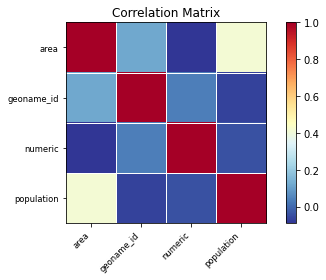

In [13]:
sm.graphics.plot_corr(corr2, xnames=list(corr.columns))
plt.show()

En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos
podría ser una buena decisión eliminar features que tuvieran alta correlación
Cargamos un segundo archivo csv para ahondar en el crecimiento de la población en los últimos
años, filtramos a España y visualizamos

In [14]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)

In [15]:
df_pop.sample(10)

,country,year,population
961,Mauritania,1957,1076852
400,Czech Republic,1972,9862158
121,Benin,1957,1925173
672,Hungary,1952,9504000
192,Burkina Faso,1952,4469979
71,Australia,2007,20434176
98,Bangladesh,1962,56839289
480,Equatorial Guinea,1952,216964
475,El Salvador,1987,4842194
379,Croatia,1987,4484310


In [16]:
df_pop.to_csv("Poblacion_crecimiento.csv")

In [17]:
df_pop_es = df_pop[ df_pop["country"] == 'Spain' ]

In [18]:
df_pop_es

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442


In [20]:
df_pop_es.drop([1416],axis=0)

,country,year,population
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442
1426,Spain,2002,40152517


<AxesSubplot:>

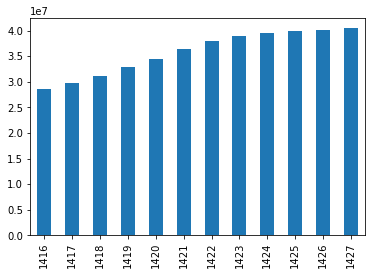

In [25]:
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

<AxesSubplot:xlabel='year'>

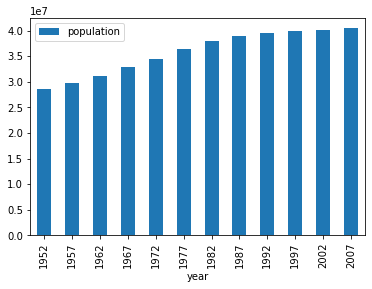

In [22]:
df_pop_es.drop(['country'],axis=1).set_index("year").plot(kind='bar')

In [26]:
df_pop_es.drop(['country'],axis=1)["population"]

1416    28549870
1417    29841614
1418    31158061
1419    32850275
1420    34513161
1421    36439000
1422    37983310
1423    38880702
1424    39549438
1425    39855442
1426    40152517
1427    40448191
Name: population, dtype: int64

In [27]:
df_pop_es.drop(['country'],axis=1).set_index("year")["population"]

year
1952    28549870
1957    29841614
1962    31158061
1967    32850275
1972    34513161
1977    36439000
1982    37983310
1987    38880702
1992    39549438
1997    39855442
2002    40152517
2007    40448191
Name: population, dtype: int64

### Comparacion españa argentina

In [28]:
df_pop_ar = df_pop[ (df_pop["country"] == 'Argentina')]
df_pop_ar

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799
53,Argentina,1977,26983828
54,Argentina,1982,29341374
55,Argentina,1987,31620918
56,Argentina,1992,33958947
57,Argentina,1997,36203463


In [31]:
años  = df_pop_es['year'].unique()
años



array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [32]:
pop_ar = df_pop_ar['population'].values
pop_ar

array([17876956, 19610538, 21283783, 22934225, 24779799, 26983828,
       29341374, 31620918, 33958947, 36203463, 38331121, 40301927])

In [33]:
pop_es = df_pop_es['population'].values
pop_es

array([28549870, 29841614, 31158061, 32850275, 34513161, 36439000,
       37983310, 38880702, 39549438, 39855442, 40152517, 40448191])

In [34]:
pop_ar

array([17876956, 19610538, 21283783, 22934225, 24779799, 26983828,
       29341374, 31620918, 33958947, 36203463, 38331121, 40301927])

In [35]:
pop_es

array([28549870, 29841614, 31158061, 32850275, 34513161, 36439000,
       37983310, 38880702, 39549438, 39855442, 40152517, 40448191])

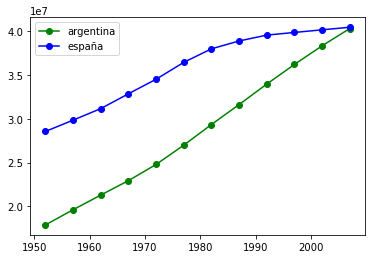

In [40]:
plt.plot(años, pop_ar  ,'go-', label = "argentina")
plt.plot(años, pop_es  ,'bo-', label = "españa")
plt.legend()
plt.show()

<AxesSubplot:>

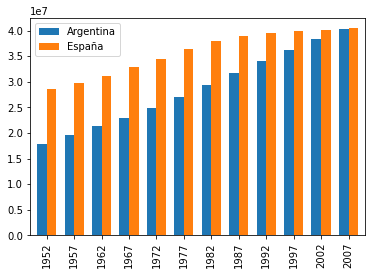

In [45]:
df_plot = pd.DataFrame({'Argentina': pop_ar,'España': pop_es},index=años)
df_plot.plot(kind='bar', width=0.7)

In [47]:
df

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [48]:
# Ahora filtremos todos los paises hispano-hablantes
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,,,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,,,.af
3,AG,ATG,443.0,St. John's,,XCD,Dollar,,AC,3576396,en-AG,Antigua and Barbuda,,28,+1-268,86754,,,.ag
4,AI,AIA,102.0,The Valley,,XCD,Dollar,,AV,3573511,en-AI,Anguilla,,660,+1-264,13254,,,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,,,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [49]:
df_espanol['languages'].str.contains('es')

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251     True
Name: languages, Length: 252, dtype: bool

In [50]:
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


In [51]:
df_espanol = df_espanol[ ( df_espanol['alpha_3'] != "USA") & ( df_espanol['alpha_3'] != "BRA")  ]

In [52]:
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do
62,EC,ECU,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec


<AxesSubplot:xlabel='alpha_3'>

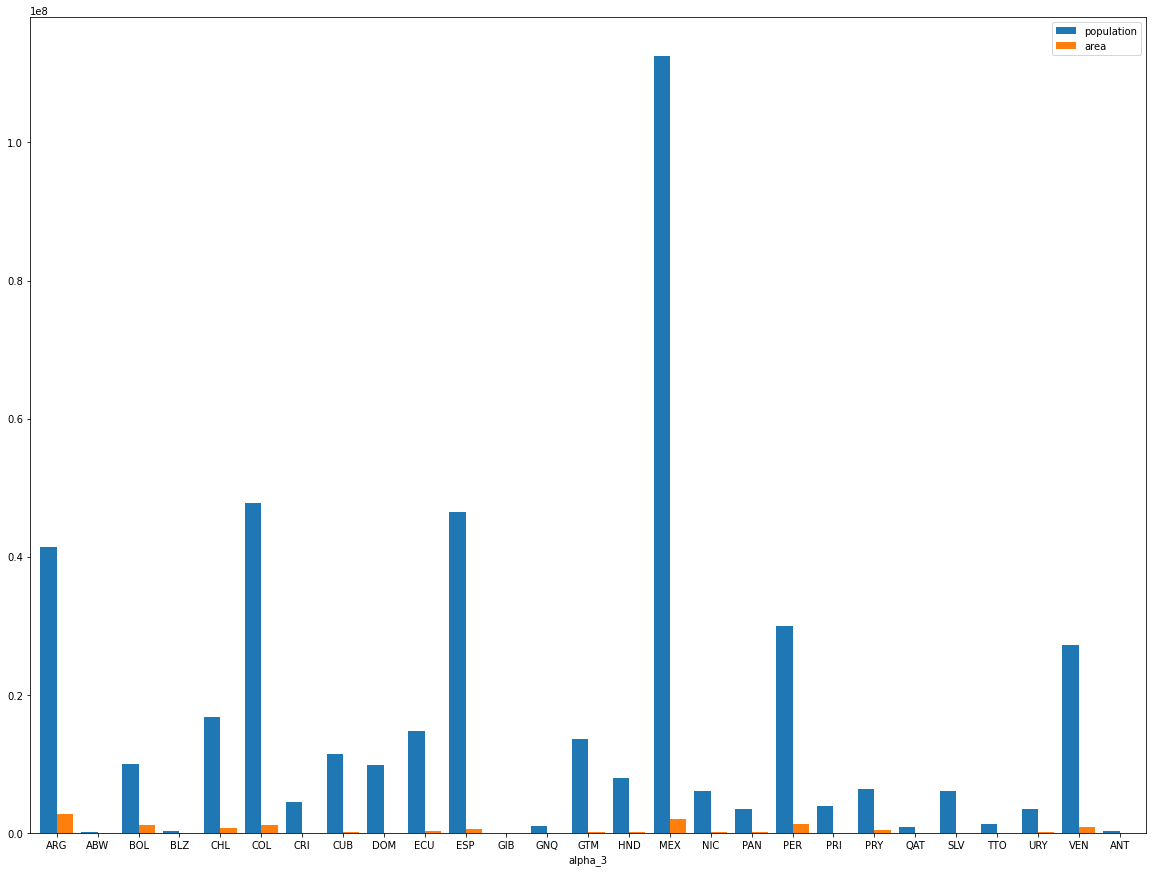

In [53]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=0,figsize=(20,15),width=0.8)

<AxesSubplot:xlabel='alpha_3'>

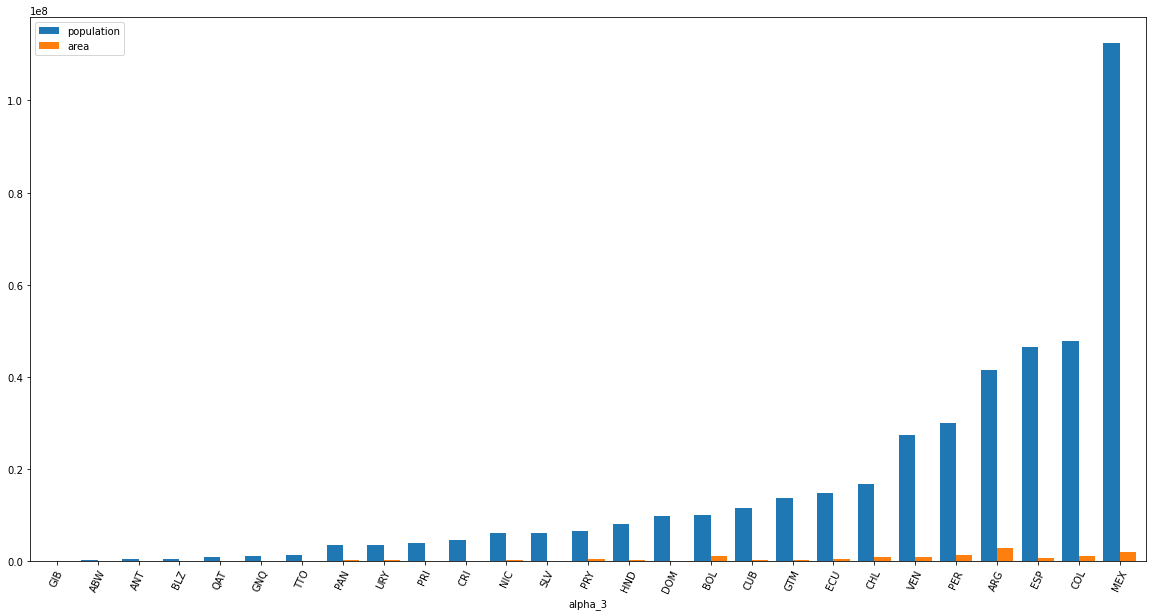

In [54]:
df_espanol.set_index('alpha_3')[
    ['population','area']].sort_values(
    ["population"]).plot(kind='bar',rot=65,figsize=(20,10),width=0.8)